In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("glass.csv")

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [12]:
scaler.fit(df.drop('Type', axis = 1))

StandardScaler()

In [13]:
scaled_feature = scaler.transform(df.drop('Type', axis = 1))

In [14]:
scaled_feature

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [15]:
df_feat = pd.DataFrame(scaled_feature,columns=df.columns[:-1])

In [16]:
df_feat

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [18]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [19]:
X = df_feat
y = df['Type']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
pred = knn.predict(X_test)

In [25]:
pred

array([2, 7, 2, 2, 2, 1, 1, 2, 1, 1, 7, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 2,
       2, 1, 1, 3, 2, 1, 5, 1, 1, 2, 2, 1, 1, 7, 1, 7, 1, 1, 2, 2, 3, 2,
       2, 1, 2, 2, 2, 3, 7, 1, 3, 7, 2, 7, 5, 1, 3, 7, 2, 1, 1, 2, 1, 1,
       2, 5, 1, 7, 3, 2, 6, 7, 7, 7, 2, 1, 1, 2, 1, 2, 7, 2, 2, 1])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(confusion_matrix(y_test,pred))

[[19  5  5  0  0  0]
 [ 4 24  1  0  0  1]
 [ 4  1  1  0  0  0]
 [ 0  3  0  3  0  2]
 [ 0  1  0  0  1  1]
 [ 1  0  0  0  0  9]]


In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.68      0.66      0.67        29
           2       0.71      0.80      0.75        30
           3       0.14      0.17      0.15         6
           5       1.00      0.38      0.55         8
           6       1.00      0.33      0.50         3
           7       0.69      0.90      0.78        10

    accuracy                           0.66        86
   macro avg       0.70      0.54      0.57        86
weighted avg       0.69      0.66      0.66        86



In [29]:
error_rate = []

In [30]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [31]:
error_rate

[0.3372093023255814,
 0.26744186046511625,
 0.313953488372093,
 0.36046511627906974,
 0.4186046511627907,
 0.3953488372093023,
 0.38372093023255816,
 0.4069767441860465,
 0.3953488372093023,
 0.4069767441860465,
 0.38372093023255816,
 0.43023255813953487,
 0.43023255813953487,
 0.4186046511627907,
 0.4069767441860465,
 0.4418604651162791,
 0.43023255813953487,
 0.4883720930232558,
 0.5116279069767442,
 0.5348837209302325,
 0.5,
 0.5116279069767442,
 0.5116279069767442,
 0.5,
 0.4883720930232558,
 0.5116279069767442,
 0.4883720930232558,
 0.4883720930232558,
 0.5232558139534884,
 0.5,
 0.5348837209302325,
 0.5116279069767442,
 0.5232558139534884,
 0.5,
 0.5,
 0.5232558139534884,
 0.5116279069767442,
 0.5116279069767442,
 0.4883720930232558]

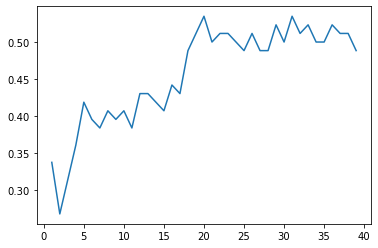

In [34]:
plt.plot(range(1,40),error_rate)

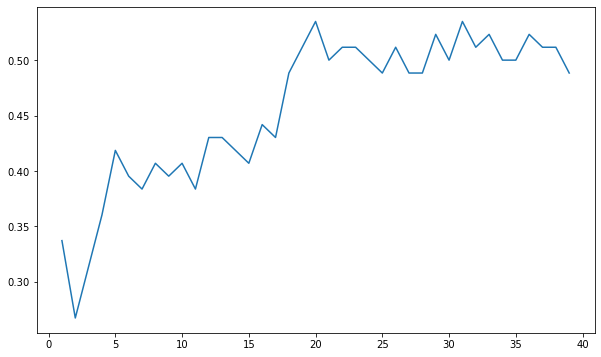

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

Text(0, 0.5, 'Error rate')

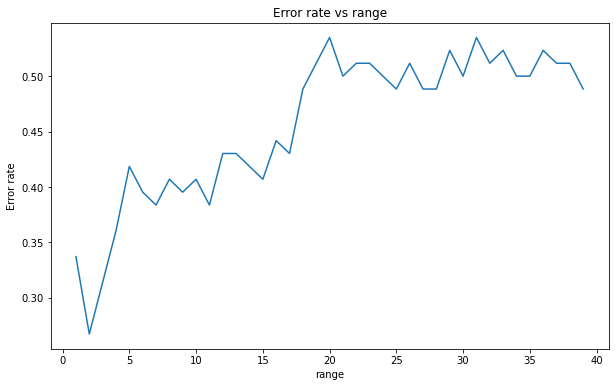

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.title("Error rate vs range")
plt.xlabel("range")
plt.ylabel("Error rate")

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [47]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[19  5  5  0  0  0]
 [ 4 24  1  0  0  1]
 [ 4  1  1  0  0  0]
 [ 0  3  0  3  0  2]
 [ 0  1  0  0  1  1]
 [ 1  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.68      0.66      0.67        29
           2       0.71      0.80      0.75        30
           3       0.14      0.17      0.15         6
           5       1.00      0.38      0.55         8
           6       1.00      0.33      0.50         3
           7       0.69      0.90      0.78        10

    accuracy                           0.66        86
   macro avg       0.70      0.54      0.57        86
weighted avg       0.69      0.66      0.66        86

